## Karina Fracieli Schmidt - 2023314

CA1 - Data Preparation

# PCA

   PCA (Principal Component Analysis) serves as a vital data analysis technique in Python, facilitating dimensionality reduction, the detection of concealed patterns, exploratory data analysis, data preprocessing, and visualization in lower-dimensional spaces, aiding in the comprehension of variable relationships. Widely applied in data science and data analysis to tackle high-dimensional datasets, PCA simplifies intricate analyses and fosters an effective grasp of data structures (Kleindessner, 2023; Gilman, 2023). 
   
  The two main ones being, reducing the dimensionality of the system models by reducing the number of variables involved. In complex systems with a large number of variables, this simplification is crucial, as it allows the creation of more concise models, which use fewer variables, for system simulation and analysis. For this, PCA is used to identify a subset of variables that is capable of representing the majority of the process data variability.
  Identification of correlations between variables or groups of variables present in the data. This identification is based on the underlying structure of the covariance matrix, allowing the relationships between sets of variables to be recognized and interpreted. These analyzes often aim to reveal underlying processes in the structure of the data that may not be apparent during an initial analysis of correlations between pairs of variables (Avelino, 2019)

## Reading data


To star the project, first starts with the codes below and are used to import and visualize data.
Containing no executions yet.

In [2]:
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns; 
import matplotlib.pyplot as plt
import pandas as pd

The next step was to read the CVS data file which is called "aps_failure_set.csv".
Where the content of this file is stored in Data Frame (df).

In [3]:
df = pd.read_csv("aps_failure_set.csv")

The abbreviation for refers to the dataframe. This way you obtain more detailed information about columns and data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [5]:
df.describe()


,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


The code below is used to count the number of null values in each column of the data frame. This way, we can know which columns we have have null data and how many of the null values there are in each column, thus applying some of the data analysis strategies.

The output information is:

Lenght in this case is 171 elements and each element represents 1 column, so we have 171 columns.
The dtype information indicates the data type of the count values, which are 64-bit integers.

In [6]:
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [7]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


We can see from the table above that there were clearly missing values. In the present case, we employ the subsequent code to perform the conversion of this missing data, which is generally interpreted by pandas as NaN (not as a number). Therefore, we can now see it in the table below.

In [8]:
import pandas as pd

missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("aps_failure_set.csv", na_values = missing_value_formats)

def make_int(i):
    try:
        return int(i)
    except:
        return pd.np.nan 

So, after applying the code, it is now possible to see the missing values change to NaN.

In [9]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


To handle missing values, the code below will transform these values from NaN to 0 in the data frame in question. Modifications are made to the pre-existing data frame, without creating a new data frame.

In [10]:
df.fillna(0,inplace=True)

After applying the code, you will notice the substitution of zero where no data is missing.

In [11]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


The following code is used to apply Principal Component Analysis (PCA) to a Data Frame.
From the generated graph, it will be possible to view the cumulative variance. With this information, it will be possible to make a decision on how many components will be needed to maintain data variation.


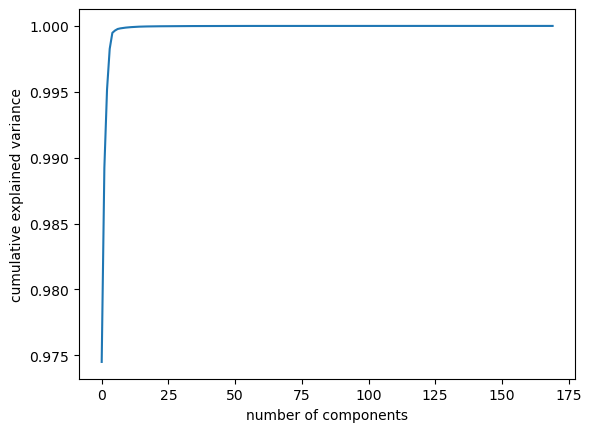

In [28]:
failure_no_label = df.drop(columns=["class"]) 
pca = PCA().fit(failure_no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');

By looking at the Cumulative Explained Variance graph above, we can determine the required number of principal components to maintain the variance. When the curve remains constant, it is possible to maintain a sufficient number of principal components to retain a high percentage of the total variance. This results in a more compact and informative representation of the data while reducing dimensionality. In the present scenario, 10 main components were used. It is noted that, even with the discarding of several components, it was possible to preserve a variance of at least 95%.


The next step consists of applying PCA, which will reduce the existing data set, while maintaining its variation. Now, the data frame has only 10 components after a reduction of 171. This way, the data that will be analyzed is simplified.

In [29]:
pca = PCA(10)
projected = pca.fit_transform(failure_no_label)

Below, we have the new number of rows and columns, after applying PCA.

In [14]:
projected.shape

(60000, 10)

Now, it is possible to create a new data frame with the name newfailure. Additionally, we have the new names for the columns that were created and renamed as C1, C2, C3, C4, C5, C6, C7, C8, C9 and C10.

In [15]:
newfailure_df = pd.DataFrame(projected, columns =['C1', 'C2', 'C3', 'C4','C5', 'C6', 'C7', 'C8', 'C9','C10'])

In [16]:
newfailure_df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,1.794496e+09,3.211523e+05,-13914.100755,3.221798e+06,1.246086e+07,5.302119e+06,-3.443515e+05,9.257055e+04,-1.213335e+06,2.904779e+06
1,-3.361937e+08,-5.375804e+06,-284084.983413,-6.810371e+06,-1.193847e+05,2.457512e+06,-2.267203e+05,-1.313286e+06,1.005464e+06,-8.059593e+05
2,-3.361927e+08,-5.608250e+06,-277150.003557,-1.020018e+07,-1.375904e+06,-1.456393e+06,8.431763e+05,1.618961e+05,-1.477105e+06,6.712679e+05
3,-3.361710e+08,-6.252036e+06,-263685.285444,-1.471480e+07,-8.833286e+06,-7.683078e+05,2.695536e+05,-2.691088e+05,5.879196e+05,-1.123004e+06
4,-3.362444e+08,-4.891118e+06,-310272.149219,1.014545e+07,-5.099864e+06,-2.738365e+06,1.926148e+06,7.931166e+05,-6.081122e+04,1.631404e+06


Just copying the class column to the new data frame, as we can see the "class" column at the end of the table.

In [17]:
newfailure_df["class"] = df["class"]

In [18]:
newfailure_df.head() 

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,class
0,1.794496e+09,3.211523e+05,-13914.100755,3.221798e+06,1.246086e+07,5.302119e+06,-3.443515e+05,9.257055e+04,-1.213335e+06,2.904779e+06,neg
1,-3.361937e+08,-5.375804e+06,-284084.983413,-6.810371e+06,-1.193847e+05,2.457512e+06,-2.267203e+05,-1.313286e+06,1.005464e+06,-8.059593e+05,neg
2,-3.361927e+08,-5.608250e+06,-277150.003557,-1.020018e+07,-1.375904e+06,-1.456393e+06,8.431763e+05,1.618961e+05,-1.477105e+06,6.712679e+05,neg
3,-3.361710e+08,-6.252036e+06,-263685.285444,-1.471480e+07,-8.833286e+06,-7.683078e+05,2.695536e+05,-2.691088e+05,5.879196e+05,-1.123004e+06,neg
4,-3.362444e+08,-4.891118e+06,-310272.149219,1.014545e+07,-5.099864e+06,-2.738365e+06,1.926148e+06,7.931166e+05,-6.081122e+04,1.631404e+06,neg


The array is a compound variable that allows us to work with storing multiple values.
It is being created to store the data frame values.

In [19]:
df_array=newfailure_df.values 

The following codes aim to divide a dataset into two distinct parts: a training set and a validation set. To perform this division, they use the train_test_split function. Data set attributes are stored in X and labels are stored in y. Then they are separated into groups. This set aims to evaluate the performance of machine learning models when testing them with unknown data, making it possible to analyze their performance in these circumstances.
To ensure that there is a validation data set, we will reserve 20% of the data with the code test_size=0.20, while the remaining 80% will be used for training.

In [20]:
from sklearn.model_selection import train_test_split
X = df_array[:,0:10]
y = df_array[:,10]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

O sklearn é um biblioteca de códigos bastante utilizada em Python, entre suas funções análise de dados.
Foi realizada a diferentes importações para o uso de diferentes funções de machine learn. 
Dessa forma, criando e deselvolvendo resultados nos códigos Python.






In [21]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In the next step, the code is generating a list of machine learning models that employ distinct algorithms and configurations. Each item in the list consists of a short name for the model, followed by an instance of that model containing specific parameters. These models can later be leveraged to improve and evaluate performance on machine learning-related tasks.

In [22]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

By using the previously mentioned import and implementing the following codes, we obtain the printout of the mean and standard deviation, which represents the measure of variability.
By observing the results obtained, we can select the model that most accurately adapts to the data we are analyzing.
The numbers demonstrate that the highest averages were obtained by LDA, KNN and SVM, but their variability was lower.
Logistic regression (LR) was the one that had the best standard deviation value (variability).

In [23]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.875375 (0.035952)
LDA: 0.981083 (0.002267)
KNN: 0.985396 (0.001282)
CART: 0.982917 (0.000955)
NB: 0.959667 (0.004290)
SVM: 0.983229 (0.000104)


From the results generated above, we can now create a graph to better visualize the distribution, median and performances of the different models previously applied. The graph can also show outliers.
This makes it easier to choose the model that best fits the data.





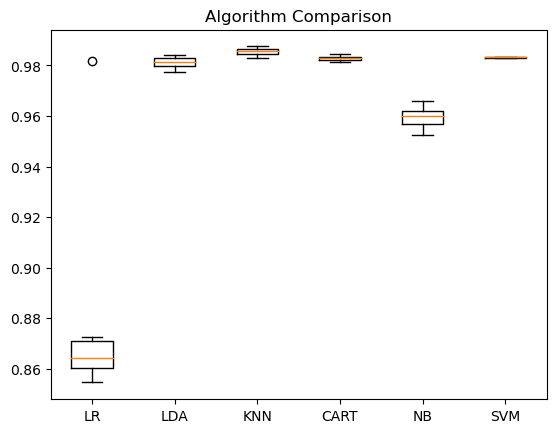

In [24]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [25]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [26]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.86275
[[10171  1638]
 [    9   182]]


The 86% accuracy value is quite satisfactory and indicates that we have highly reliable results, with a low risk of error. This provides more security when making decisions.

When we consider the issue of precision, it is vital to adapt activities according to the needs and particularities of each organization and process.

In this analysis, we discuss the Air Pressure System (APS) in trucks, which can result in failures in several truck functions. I believe that as the value of accuracy increases, the chances of errors decrease, which can even prevent serious accidents in certain cases.


## Curse of Dimentionality

The Curse of Dimensionality is a challenge in analyzing high-dimensional data, due to increased complexity, data scarcity, and difficulty in visualization. Dimensionality reduction and judicious choice of data preparation techniques are key to dealing with complex data sets and ensuring effective results in data analysis and machine learning.

PCA can be used to benefit dimensionality reduction without substantially altering the data, which can be an effective strategy to reduce the challenges of the Curse of Dimensionality, enabling more efficient and effective analysis in high-dimensional spaces.



## REFERENCES


Avelino (author), E.R. & E.F. (2019). Fundamentals of Machine Learning using Python. [online] Amazon. Arcler Press. Available at: https://www.amazon.co.uk/Fundamentals-Machine-Learning-using-Python/dp/177407365X [Accessed 31 Oct. 2023].

Gilman, K., Hong, D., Fessler, J.A. and Balzano, L. (2023). Streaming Probabilistic PCA for Missing Data with Heteroscedastic Noise. [online] arXiv.org. doi:https://doi.org/10.48550/arXiv.2310.06277.

Kleindessner, M., Donini, M., Russell, C. and Zafar, M.B. (2023). Efficient fair PCA for fair representation learning. [online] arXiv.org. doi:https://doi.org/10.48550/arXiv.2302.13319.


Springer. (n.d.). Artificial Intelligence Review. [online] Available at: https://www.springer.com/journal/10462 [Accessed 31 Oct. 2023].

